In [2]:
import numpy as np
import pandas as pd
import random

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn import metrics
from sklearn.decomposition import PCA

#import xcode
import sys
sys.path.append('E:/gitlab/project_on_python/my_own_modul/visualization_and_description')
from ursar import visual, describe, model, clustering

C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in

In [4]:
main_data = pd.read_csv("jewellery.csv", sep=",")
main_data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


# KNN to detect outliers

In [5]:
# train kNN detector
from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(main_data)
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = clf.decision_scores_

In [6]:
# Now we have the trained K-NN model, let's apply to the test data to get the predictions
y_test_pred = clf.predict(main_data) # outlier labels (0 or 1)
# Because it is '0' and '1', we can run a count statistic. There are 44 '1's and 456 '0's. The number of anomalies is roughly ten percent, as we have generated before:
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))
#{0: 456, 1: 44}
# And you can generate the anomaly score using clf.decision_function:
y_test_scores = clf.decision_function(main_data)

# Determine a reasonable boundary

<IPython.core.display.Javascript object>


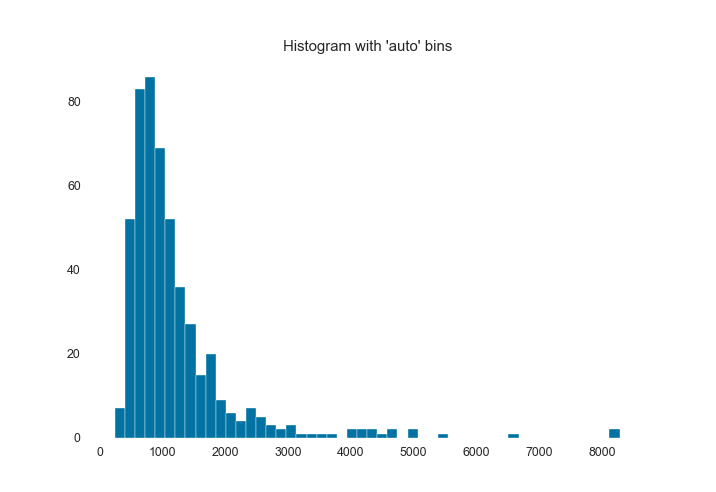

In [16]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [10]:
# Let's see how many '0's and '1's. We get 452 '0's and 48 '1's.
df_test = pd.DataFrame(main_data)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<1, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
# df_test.groupby('y_by_average_cluster').mean()
df_test.groupby('cluster').mean()

,Age,Income,SpendingScore,Savings,score
cluster,,,,,
1,59.019802,75513.291089,0.505083,11862.455867,1188.75599


<IPython.core.display.Javascript object>


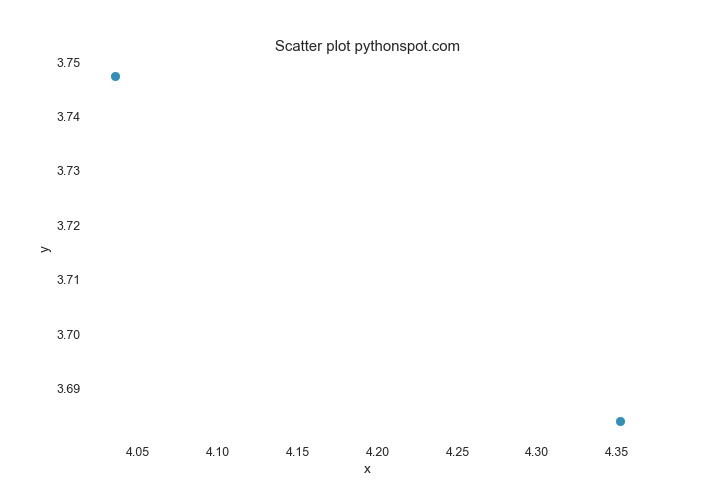

In [18]:
import numpy as np
import pandas as pd
from pyod.utils.data import generate_data

contamination = 0.1 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 2      # number of features
X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, n_features= n_features, contamination=contamination)
 
# Plot
plt.scatter(X_train[0], X_train[1], alpha=0.8)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()